In [8]:
import sys
import os

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
simulation_dir = os.path.join(parent_dir, "optimize_rl")

sys.path.insert(0, simulation_dir)

c:\coding\project\LVR-Diamond-DynamicBeta


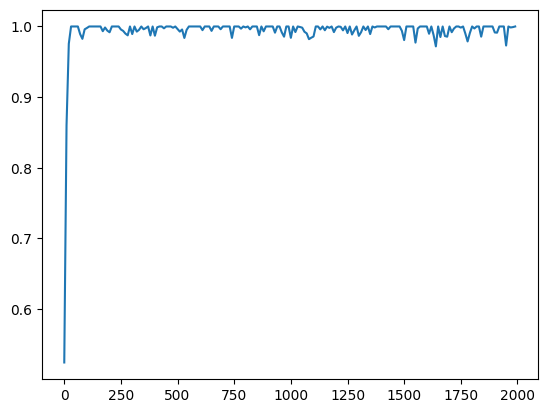

In [197]:
# Plot the model
import numpy as np
import matplotlib.pyplot as plt
import torch

from PPO import ActorCritic

device = 'cpu'
ppo_agent = ActorCritic(1,1,1,0.1).to(device)
ppo_agent.action_var= ppo_agent.action_var.to(device)
ppo_agent.load_state_dict(torch.load("../optimize_rl/PPO_preTrained/LVR/PPO_LVR_0_0_15.pth"))

volatility_range = np.arange(0,2000,10)

beta = []
for i in volatility_range:
    state = torch.from_numpy(np.array([i]).astype(np.float32))
    state = state.to(device)  # move the state to the same device as the model
    action,_,_ = ppo_agent.act(state)
    # print(action)
    beta.append(action[0])  # move the action to the CPU and convert it to a NumPy array

plt.plot(volatility_range, beta)

In [190]:
import pandas as pd

result = pd.read_csv("results/result_test.csv")
result_new_liquidity = pd.read_csv("results/result_new_liquidity.csv")

num_pools = 3
pool_names = ['CFMM', 'Diamond', 'Dynamic Diamond']

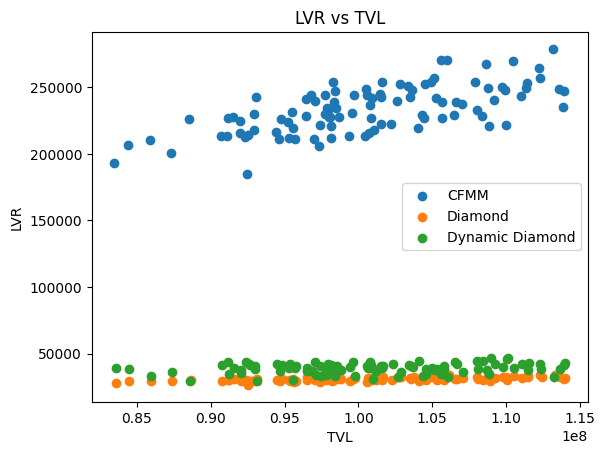

In [191]:
plt.figure()
plt.title('LVR vs TVL')
plt.xlabel('TVL')
plt.ylabel('LVR')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    lvr = result['LVR_'+str(pool)]
    plt.scatter(tvl, lvr, label=pool_names[i])

plt.legend()

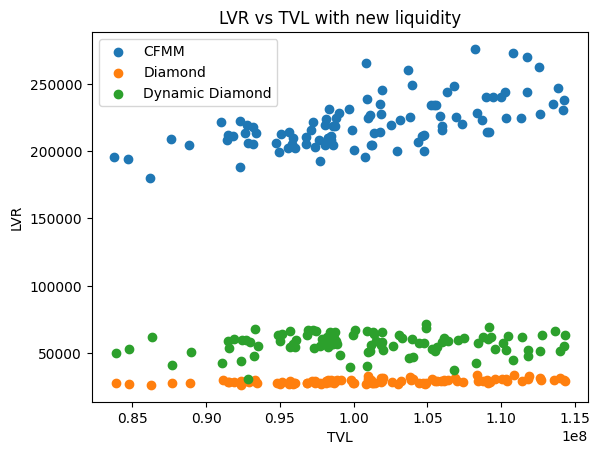

In [192]:
plt.figure()
plt.title('LVR vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('LVR')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    lvr = result_new_liquidity['LVR_'+str(pool)]
    plt.scatter(tvl, lvr, label=pool_names[i])

plt.legend()

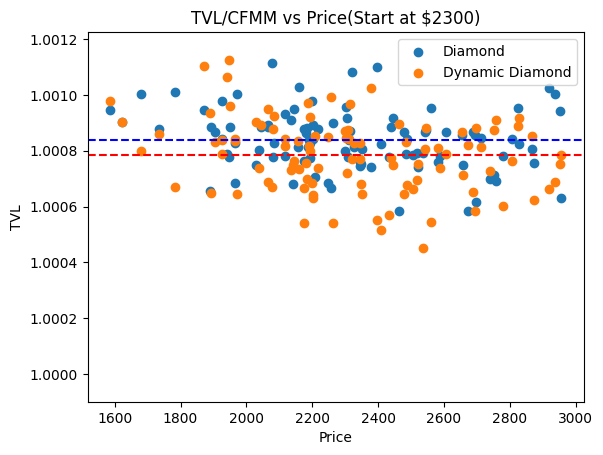

In [193]:
plt.figure()
plt.title('TVL/CFMM vs Price(Start at $2300)')
plt.xlabel('Price')
plt.ylabel('TVL')

color = ['b' , 'r']
for i in range(1,num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)] / result['TVL_1']
    price = result['Price']
    plt.scatter(price, tvl, label=pool_names[i])
    plt.axhline(y=tvl.mean(), color=color[i-1], linestyle='--')

plt.ylim(bottom=0.9999, top = max(result['Best Pool TVL/CFMM'])*1.0001)

plt.legend()

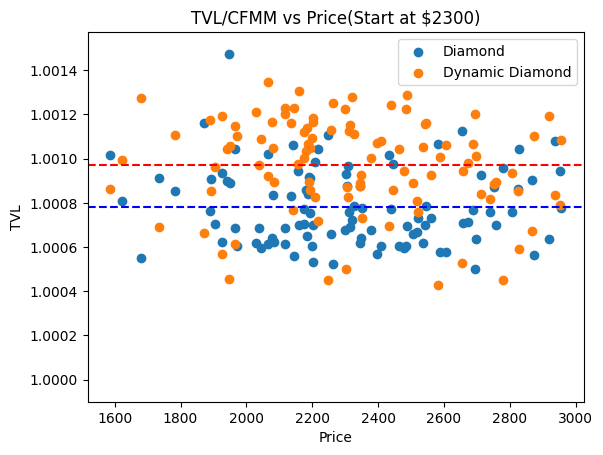

In [134]:
plt.figure()
plt.title('TVL/CFMM vs Price(Start at $2300) with new liquidity')
plt.xlabel('Price')
plt.ylabel('TVL')

color = ['b' , 'r']
for i in range(1,num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)] / result_new_liquidity['TVL_1']
    price = result_new_liquidity['Price']
    plt.scatter(price, tvl, label=pool_names[i])
    plt.axhline(y=tvl.mean(), color=color[i-1], linestyle='--')

plt.ylim(bottom=0.9999, top = max(result_new_liquidity['Best Pool TVL/CFMM'])*1.0001)

plt.legend()

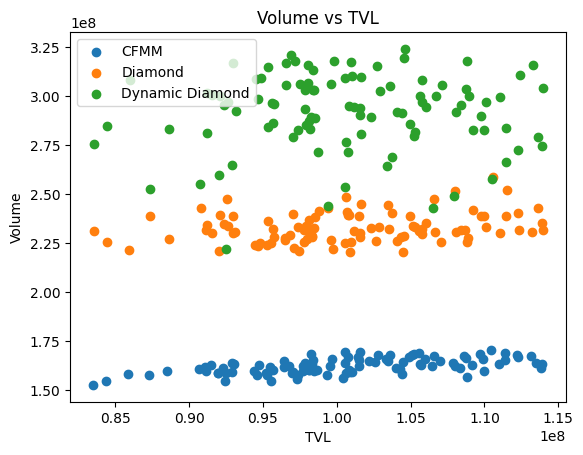

In [147]:
plt.figure()
plt.title('Volume vs TVL')
plt.xlabel('TVL')
plt.ylabel('Volume')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Volume_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

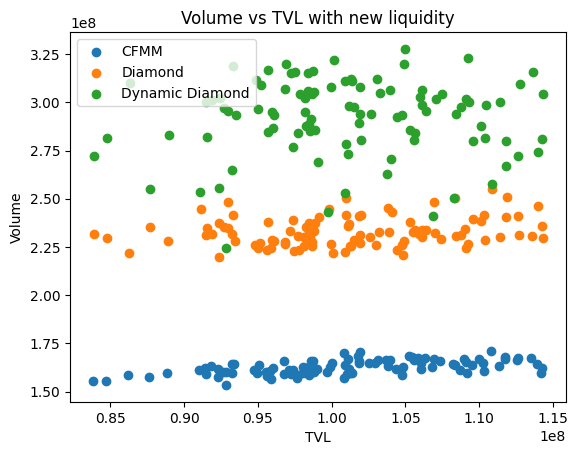

In [146]:
plt.figure()
plt.title('Volume vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('Volume')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    volume = result_new_liquidity['Volume_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

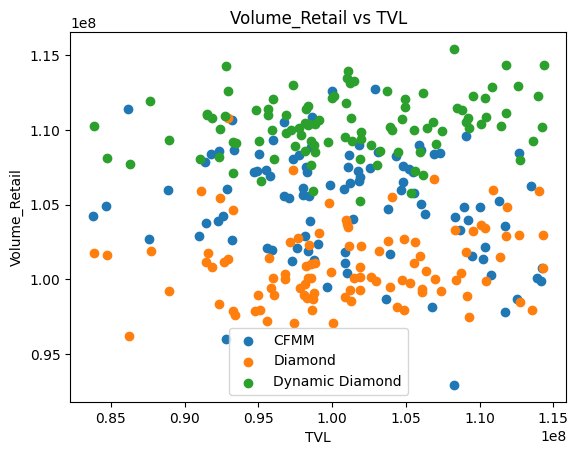

In [151]:
plt.figure()
plt.title('Volume_Retail vs TVL')
plt.xlabel('TVL')
plt.ylabel('Volume_Retail')

for i in range(num_pools):
    pool = i+1
    tvl = result['TVL_'+str(pool)]
    volume = result['Volume_Retail_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

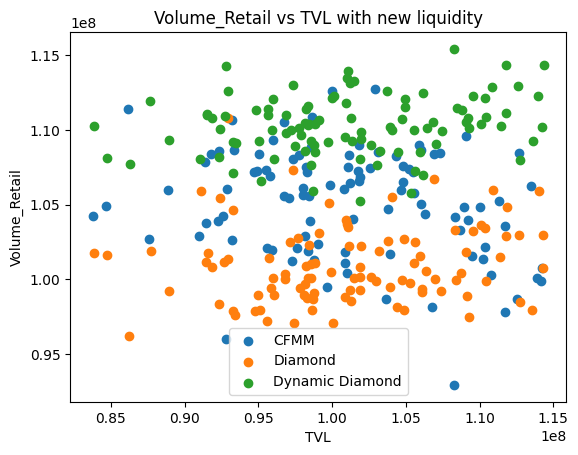

In [150]:
plt.figure()
plt.title('Volume_Retail vs TVL with new liquidity')
plt.xlabel('TVL')
plt.ylabel('Volume_Retail')

for i in range(num_pools):
    pool = i+1
    tvl = result_new_liquidity['TVL_'+str(pool)]
    volume = result_new_liquidity['Volume_Retail_'+str(pool)]
    plt.scatter(tvl, volume, label=pool_names[i])

plt.legend()

In [189]:
from math import exp

INITIAL_MIN_FEES = 0.01 / 100
ALPHA1 = 3000 / 1000000
ALPHA2 = (15000 - 3000) / 1000000
BETA1 = 360
BETA2 = 60000
GAMMA1 = 1 / 59
GAMMA2 = 1 / 8500
VOLUME_BETA = 0
VOLUME_GAMMA = 0


def custom_sigmoid(x, alpha, gamma, beta):
    if gamma * abs(beta - x) > 700:
        return alpha / (1 + exp(700))

    return alpha / (1 + exp(gamma * abs(beta - x)))


